# Predicting Car Stopping Distance

The goal of this project is to predict a car’s stopping distance by constructing a predictive model that will utilize the car’s speed and the corresponding stopping distance.


Data

The source of the dataset is Ezekiel, M. (1930) Methods of Correlation Analysis. Wiley.
They note the dataset is from the decade of the last century - the 1920’s.

The dataset has two numerical attributes:

- speed - speed of the car in mph
- dist - stopping distance in feet

In [1]:
#basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#train test split, grid search
from sklearn.model_selection import train_test_split, GridSearchCV

#regression models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

#evaluation
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
#loading the data
data = pd.read_csv('cars.csv', index_col=0)

## Data Exploration and Visualization

In [3]:
data.head()

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16


In [4]:
#basic statistics
data.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   50 non-null     int64
 1   dist    50 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


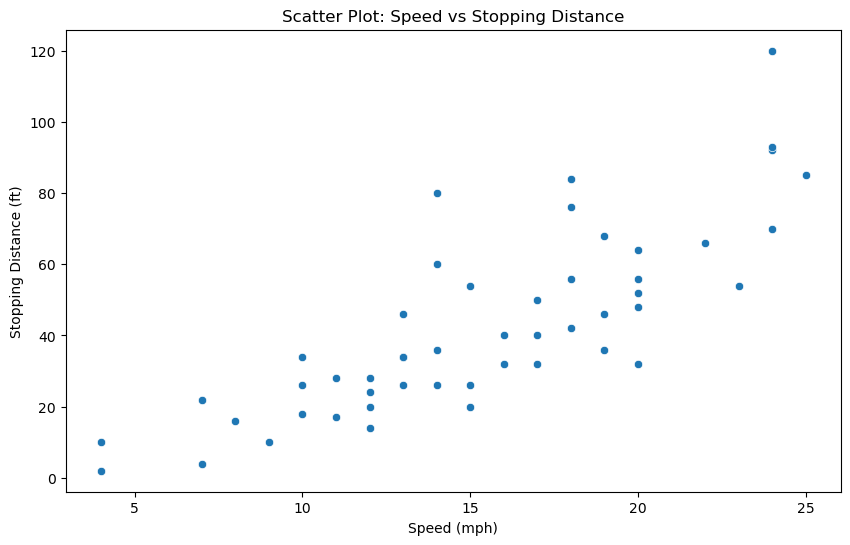

In [6]:
#speed and stopping distance scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='speed', y='dist', data=data)
plt.title('Scatter Plot: Speed vs Stopping Distance')
plt.xlabel('Speed (mph)')
plt.ylabel('Stopping Distance (ft)')
plt.show()

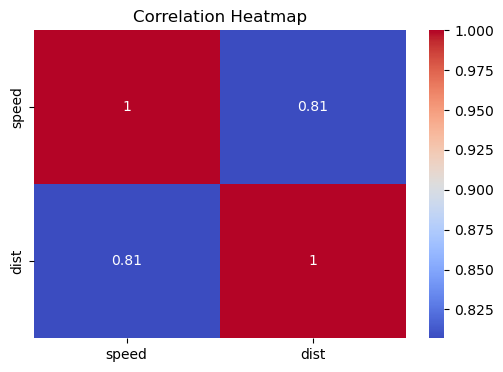

In [7]:
#correlation 
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

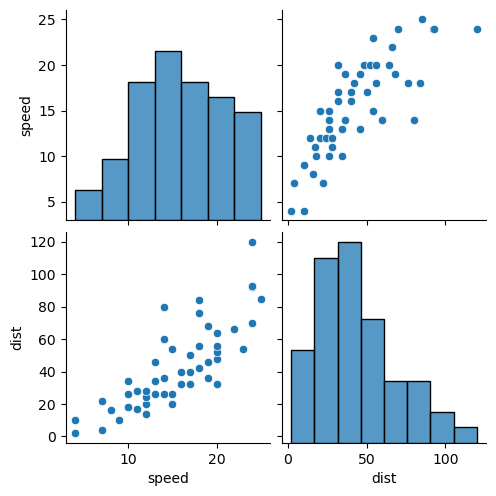

In [8]:
#pairplot
sns.pairplot(data)
plt.show()

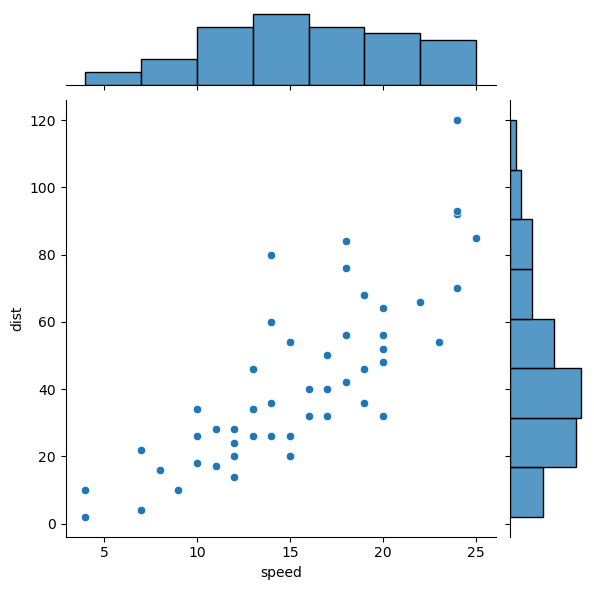

In [9]:
#jointplot
sns.jointplot(x='speed', y='dist', data=data, kind='scatter')
plt.show()

## Data Modeling

In [10]:
#splitting the data into a train and test set
X = data[['speed']]
y = data['dist']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fitting different regression models

In [11]:
#fitting models

#Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

#Polynomial
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)

#Random Forest
model_rf = RandomForestRegressor(oob_score=True, random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(model_rf, param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

#decicion tree
model_dt = DecisionTreeRegressor(random_state=42)
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_dt = GridSearchCV(model_dt, param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)

#support vector machines
model_svr = SVR(kernel='rbf')
model_svr.fit(X_train, y_train)

#gradient boost
model_gb = GradientBoostingRegressor(random_state=42)
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_gb = GridSearchCV(model_gb, param_grid_gb, cv=5)
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

## Model Evaluation

In [12]:
#evaluation instances
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

X_poly_test = poly.transform(X_test)
y_pred_poly = model_poly.predict(X_poly_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

y_pred_rf = grid_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

y_pred_svr = model_svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

y_pred_gb = grid_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

y_pred_dt = grid_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

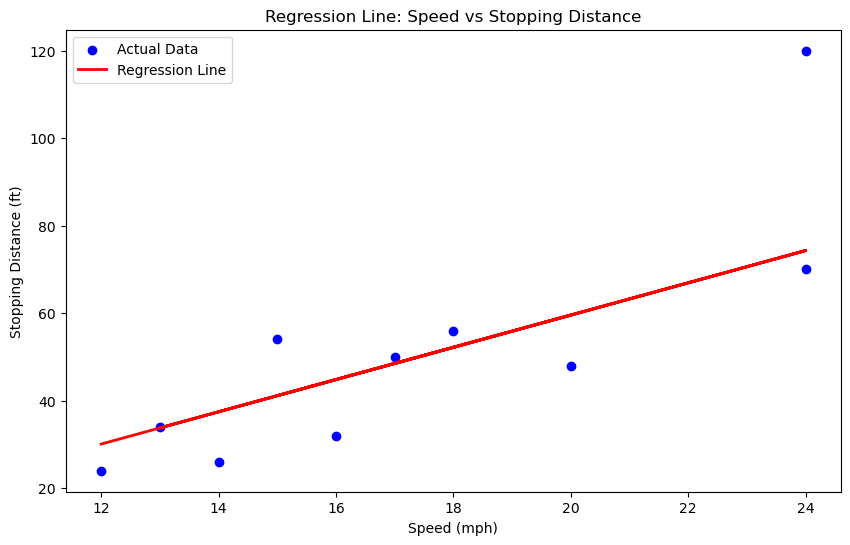

In [13]:
#linreg regression line and actual data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred_lr, color='red', linewidth=2, label='Regression Line')

plt.title('Regression Line: Speed vs Stopping Distance')
plt.xlabel('Speed (mph)')
plt.ylabel('Stopping Distance (ft)')
plt.legend()
plt.show()

In [14]:
#evaluation dataframe
models = ['Linear Regression', 'Polynomial Regression', 'Random Forest', 'SVR', 'Gradient Boosting', 'Decision Tree']
y_preds = [y_pred_lr, y_pred_poly, y_pred_rf, y_pred_svr, y_pred_gb, y_pred_dt]
mse_scores = [mse_lr, mse_poly, mse_rf, mse_svr, mse_gb, mse_dt]
r2_scores = [r2_lr, r2_poly, r2_rf, r2_svr, r2_gb, r2_dt]

# Create a DataFrame to store the evaluation scores
evaluation_df = pd.DataFrame({
    'Model': models,
    'Mean Squared Error (MSE)': mse_scores,
    'R-squared (R2) Score': r2_scores
})

evaluation_df

,Model,Mean Squared Error (MSE),R-squared (R2) Score
0,Linear Regression,275.428983,0.615773
1,Polynomial Regression,244.521644,0.658890
2,Random Forest,281.244514,0.607661
3,SVR,743.360370,-0.036996
4,Gradient Boosting,293.433486,0.590657
5,Decision Tree,290.146785,0.595242


## Model Comparison and Visualizations

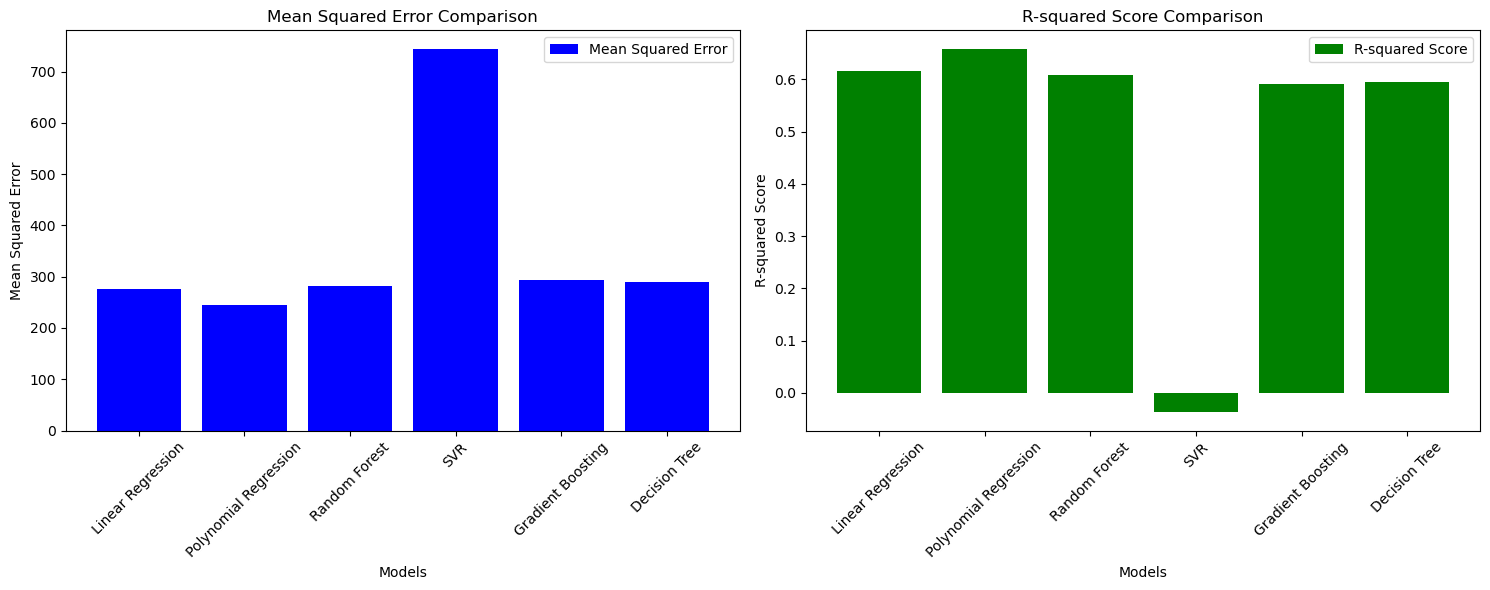

In [15]:
#plotting MSE and R2
plt.figure(figsize=(15, 6))

#MSE
plt.subplot(1, 2, 1)
plt.bar(models, mse_scores, color='blue', label='Mean Squared Error')
plt.title('Mean Squared Error Comparison')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.legend()

#R2
plt.subplot(1, 2, 2)
plt.bar(models, r2_scores, color='green', label='R-squared Score')
plt.title('R-squared Score Comparison')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

### Additional Statistics

In [16]:
#linear regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

#random forest
y_pred_rf_train = grid_rf.predict(X_train)
oob_error_rf = 1 - grid_rf.best_estimator_.oob_score_


#gradient boosting
y_pred_gb_train = grid_gb.predict(X_train)  # Predictions on the training set for learning curve
train_errors_gb = [mean_squared_error(y_train, y_pred) for y_pred in grid_gb.best_estimator_.staged_predict(X_train)]
validation_errors_gb = [mean_squared_error(y_test, y_pred) for y_pred in grid_gb.best_estimator_.staged_predict(X_test)]

#some general metrics
adjusted_r2_lr = 1 - (1 - r2_lr) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mpe_lr = np.mean((y_test - y_pred_lr) / y_test) * 100
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100

#displaying additional statistics
print("Linear Regression Additional Statistics:")
print(f'Mean Absolute Error (MAE): {mae_lr:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_lr:.2f}')
print(f'Adjusted R-squared: {adjusted_r2_lr:.2f}')
print(f'Mean Percentage Error (MPE): {mpe_lr:.2f}%')
print(f'Mean Absolute Percentage Error (MAPE): {mape_lr:.2f}%')

print("\nRandom Forest Additional Statistics:")
print(f'Out-of-Bag (OOB) Error: {oob_error_rf:.4f}')

print("\nGradient Boosting Additional Statistics:")
print(f'Learning Curve - Train Errors: {train_errors_gb}')
print(f'Learning Curve - Validation Errors: {validation_errors_gb}')

Linear Regression Additional Statistics:
Mean Absolute Error (MAE): 11.03
Root Mean Squared Error (RMSE): 16.60
Adjusted R-squared: 0.57
Mean Percentage Error (MPE): -6.77%
Mean Absolute Percentage Error (MAPE): 21.21%

Random Forest Additional Statistics:
Out-of-Bag (OOB) Error: 0.3785

Gradient Boosting Additional Statistics:
Learning Curve - Train Errors: [602.5176744999999, 593.5896804023646, 584.839353387272, 576.2631578797798, 567.857628662887, 559.6193694774099, 551.5450516497241, 543.6314127468091, 535.8752552580622, 528.2734453033414, 520.8229113667195, 513.5206430554364, 506.36368988354786, 499.3491600797797, 492.4742194191067, 485.73609007758114, 479.1320495099518, 472.65942934961834, 466.31561433047546, 460.0980412302136, 454.00419783464696, 448.031621922652, 442.17790027130593, 436.44066768082155, 430.81760601888766, 425.3064432840264, 419.90495268758895, 414.6109517540205, 409.4223014390301, 404.3369052653079, 399.3527084754429, 394.46769720169624, 389.67989765229703, 384

In [17]:
#dataframe with additional statistics (without gradient boosting)
additional_stats_df = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 
               'Root Mean Squared Error (RMSE)', 
               'Adjusted R-squared', 
               'Mean Percentage Error (MPE)', 
               'Mean Absolute Percentage Error (MAPE)', 
               'Out-of-Bag (OOB) Error'],
    'Linear Regression': [mae_lr, rmse_lr, adjusted_r2_lr, mpe_lr, mape_lr, '-'],
    'Random Forest': ['-', '-', '-', '-', '-', oob_error_rf]
})

additional_stats_df

,Metric,Linear Regression,Random Forest
0,Mean Absolute Error (MAE),11.031431,-
1,Root Mean Squared Error (RMSE),16.596053,-
2,Adjusted R-squared,0.567745,-
3,Mean Percentage Error (MPE),-6.767803,-
4,Mean Absolute Percentage Error (MAPE),21.213804,-
5,Out-of-Bag (OOB) Error,-,0.378481


In [18]:
#using statsmodel to display linreg coefficients, and p-values
X = sm.add_constant(X)

#fitting the model
model = sm.OLS(y, X).fit()

#getting values
coefficients_lr = model.params
p_values = model.pvalues

#dataframe with values
coeff_pval_df = pd.DataFrame({
    'Coefficient': coefficients_lr,
    'P-value': p_values
})

print('Linear Regression:')
coeff_pval_df

Linear Regression:


,Coefficient,P-value
const,-17.579095,1.231882e-02
speed,3.932409,1.489836e-12
